# Data Preprocessing

In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/LIWC/counsel_df_cleaned_LIWC_analysis.csv'
counsel_df_LIWC_analysis = pd.read_csv(file_path)

In [2]:
counsel_df_LIWC_analysis.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 137 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    ID                        int64  
 1    topic                     object 
 2    question                  object 
 3    answer                    object 
 4    upvotes                   int64  
 5    views                     int64  
 6    upvotes_scaled            float64
 7    views_scaled              float64
 8    weighted_engagement       float64
 9    engagement                object 
 10   modal_verbs               int64  
 11   concreteness              float64
 12   flesch_reading_ease       float64
 13   ari                       float64
 14   clause_density            int64  
 15   t_unit_complexity         int64  
 16   present_indicative_verbs  int64  
 17   self_referential_sent     int64  
 18   Segment                   int64  
 19   WC                        int64  
 20   Analyt

In [3]:
# Dropping unnecessary columns for modeling
counsel_df_LIWC_analysis.drop(['question', 'upvotes', 'views', 'upvotes_scaled', 'views_scaled', 'weighted_engagement'], axis=1, inplace=True)

In [4]:
counsel_df_LIWC_analysis.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 131 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    ID                        int64  
 1    topic                     object 
 2    answer                    object 
 3    engagement                object 
 4    modal_verbs               int64  
 5    concreteness              float64
 6    flesch_reading_ease       float64
 7    ari                       float64
 8    clause_density            int64  
 9    t_unit_complexity         int64  
 10   present_indicative_verbs  int64  
 11   self_referential_sent     int64  
 12   Segment                   int64  
 13   WC                        int64  
 14   Analytic                  float64
 15   Clout                     float64
 16   Authentic                 float64
 17   Tone                      float64
 18   WPS                       float64
 19   BigWords                  float64
 20   Dic   

# 1. EDA
- Understand the relationship and patterns in the data, especially regarding how different features might relate to the engagement level.

In [5]:
# Checking the distribution of the target variable 'engagement'
engagement_distribution = counsel_df_LIWC_analysis['engagement'].value_counts()

# Checking for missing values in the dataset
missing_values = counsel_df_LIWC_analysis.isnull().sum()

# Identifying categorical and numerical columns
categorical_columns = counsel_df_LIWC_analysis.select_dtypes(include=['object']).columns.tolist()
numerical_columns = counsel_df_LIWC_analysis.select_dtypes(exclude=['object']).columns.tolist()

In [6]:
print(engagement_distribution)

engagement
Low       1785
Medium     488
High       342
Name: count, dtype: int64


In [7]:
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [8]:
len(categorical_columns), len(numerical_columns)

(3, 128)

The resulting dataset comprises 2,615 entries, each characterized by a unique combination of numerical and linguistic features, along with categorical variables like 'topic' and 'engagement'. The target variable 'engagement', which exhibits a class imbalance with predominant instances of 'Low' engagement (n=1785), 'medium' (n=488), and 'high' (n=342), suggesting potential challenges in predictive modeling that require careful consideration of class distribution.

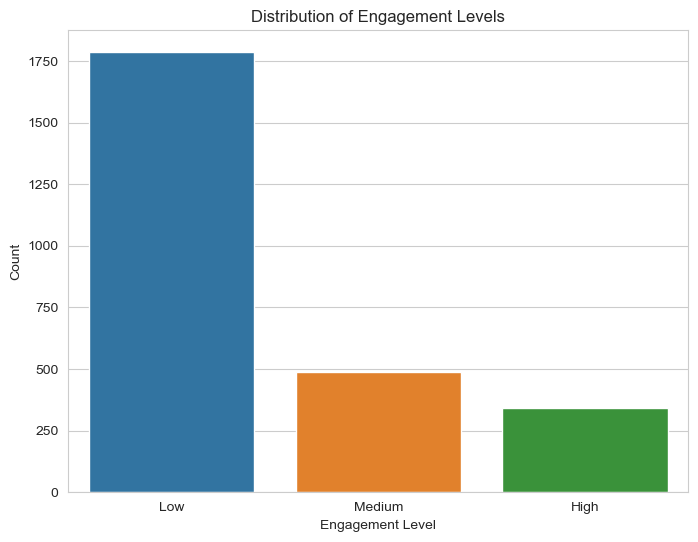

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of the target variable 'engagement'
plt.figure(figsize=(8, 6))
sns.countplot(x='engagement', data=counsel_df_LIWC_analysis, order = counsel_df_LIWC_analysis['engagement'].value_counts().index)
plt.title('Distribution of Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.show()

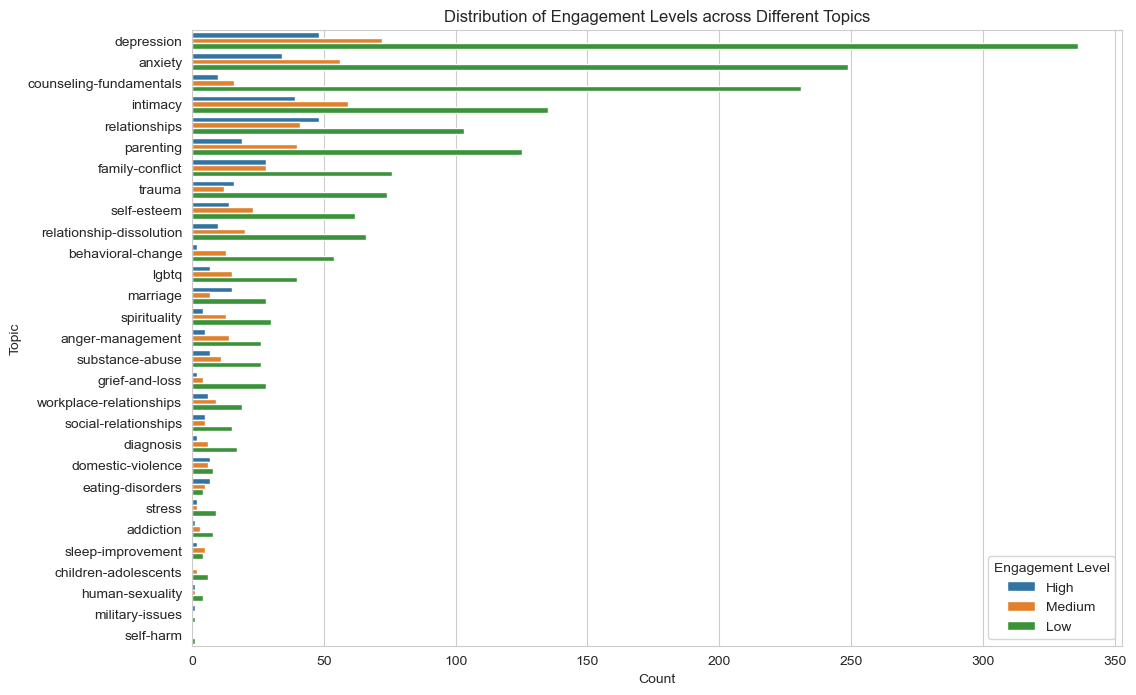

In [10]:
# Plotting the relationship between 'topic' and 'engagement'
plt.figure(figsize=(12, 8))
sns.countplot(y='topic', hue='engagement', data=counsel_df_LIWC_analysis, order = counsel_df_LIWC_analysis['topic'].value_counts().index)
plt.title('Distribution of Engagement Levels across Different Topics')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.legend(title='Engagement Level')
plt.show()

In [11]:
from sklearn.preprocessing import OrdinalEncoder

# Encoding the 'engagement' variable
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
counsel_df_LIWC_analysis['engagement_encoded'] = encoder.fit_transform(counsel_df_LIWC_analysis[['engagement']]).flatten()

In [12]:
# Calculating correlations of numerical variables with the encoded engagement level
correlation_with_engagement = counsel_df_LIWC_analysis[numerical_columns + ['engagement_encoded']].corr()['engagement_encoded']

# Sorting correlations for better visualization and understanding
sorted_correlation = correlation_with_engagement.sort_values(ascending=False)

In [13]:
sorted_correlation

engagement_encoded       1.000000
self_referential_sent    0.147684
concreteness             0.129145
t_unit_complexity        0.128603
WC                       0.123210
                           ...   
emo_sad                 -0.048330
Exclam                  -0.053943
Physical                -0.074899
health                  -0.096583
Segment                       NaN
Name: engagement_encoded, Length: 129, dtype: float64

- Positive Correlations: Variables like 'self_referential_sent', 'concreteness', 't_unit_complexity', and 'WC' (word count) show a positive correlation with engagement level. This suggests that higher values in these metrics are associated with higher engagement levels ('High' over 'Low').

- Negative Correlations: Variables such as 'emo_sad', 'Exclam', 'Physical', and 'health' exhibit negative correlations. This implies that higher values in these metrics might be associated with lower engagement levels.

- Correlation Strength: It's important to note that the correlation values are relatively low, indicating that no single variable strongly predicts engagement levels by itself.

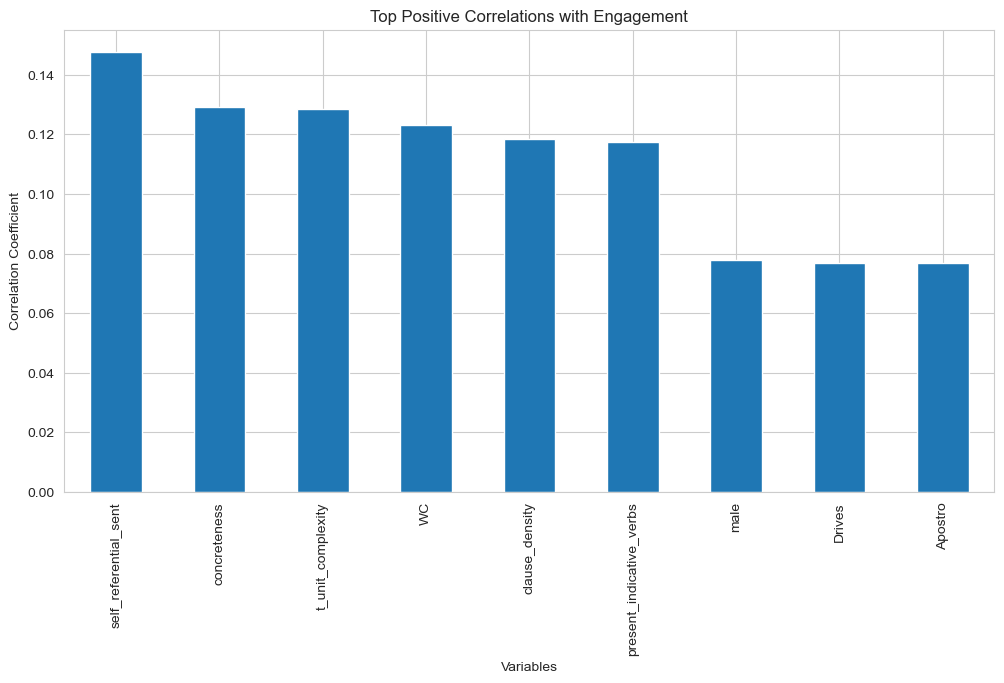

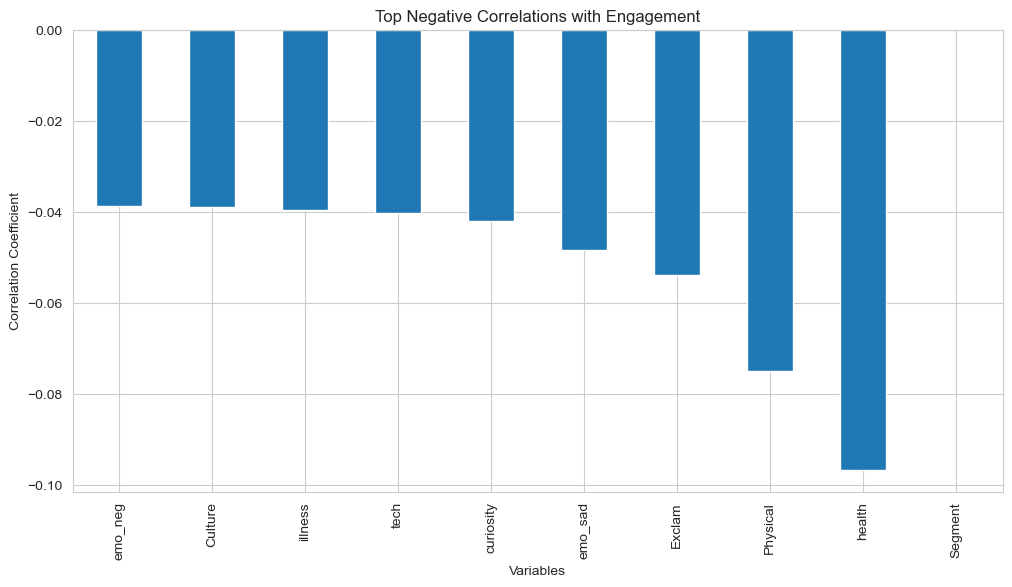

In [14]:
# Selecting top positively and negatively correlated variables for visualization
top_positive_correlations = sorted_correlation.head(10)
top_negative_correlations = sorted_correlation.tail(10)

# Plotting the top positive correlations
plt.figure(figsize=(12, 6))
top_positive_correlations.drop('engagement_encoded').plot(kind='bar')
plt.title('Top Positive Correlations with Engagement')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

# Plotting the top negative correlations
plt.figure(figsize=(12, 6))
top_negative_correlations.plot(kind='bar')
plt.title('Top Negative Correlations with Engagement')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()


# 2. Modeling
## 2.1 Basemodel: Multinomial Naive Base Classifier. 

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_auc_score, f1_score

In [16]:
# Preprocessing and feature extraction
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

X_answer = counsel_df_LIWC_analysis['answer']
y = counsel_df_LIWC_analysis['engagement']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_answer, y, test_size=0.2, random_state=42, stratify=y)

# Creating a Naive Bayes classifier pipeline with TF-IDF
model = make_pipeline(vectorizer, MultinomialNB())

# Training the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=1000, stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [17]:
# Predicting the engagement levels on the test set
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred) # Evaluating the model
print(report)

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        68
         Low       0.68      1.00      0.81       357
      Medium       0.00      0.00      0.00        98

    accuracy                           0.68       523
   macro avg       0.23      0.33      0.27       523
weighted avg       0.47      0.68      0.55       523


/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### Handling class imbalance

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Defining the resampling strategy
over = SMOTE(sampling_strategy={'High': 1000, 'Medium': 1000})  # Oversampling to 1000 samples each for Medium and High
under = RandomUnderSampler(sampling_strategy={'Low': 1500})  # Undersampling to 1500 samples for Low
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Resampling the dataset
X_resampled, y_resampled = pipeline.fit_resample(vectorizer.transform(X_answer), y)

# Splitting the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Training the Naive Bayes classifier on the resampled data
nb_model_resampled = MultinomialNB()
nb_model_resampled.fit(X_train_resampled, y_train_resampled)

# Predicting on the test set
y_pred_resampled = nb_model_resampled.predict(X_test_resampled)

# Evaluating the model
report_resampled = classification_report(y_test_resampled, y_pred_resampled)

print(report_resampled)


              precision    recall  f1-score   support

        High       0.65      0.53      0.59       200
         Low       0.58      0.82      0.68       300
      Medium       0.65      0.36      0.47       200

    accuracy                           0.61       700
   macro avg       0.63      0.57      0.58       700
weighted avg       0.62      0.61      0.59       700



### Bruteforce the process to find the best upsampling and downsampling ratio

In [37]:
X = vectorizer.fit_transform(X_answer)

# Different sample sizes to test
sample_sizes = [ 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]

# Storing the results
results = []

for over_size in sample_sizes:
    for under_size in sample_sizes:
        # Define the resampling strategy
        over = SMOTE(sampling_strategy={'High': over_size, 'Medium': over_size})
        under = RandomUnderSampler(sampling_strategy={'Low': under_size})
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)

        # Resample the dataset
        X_resampled, y_resampled = pipeline.fit_resample(X, y)

        # Splitting the resampled data
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

        # Training the Naive Bayes classifier
        model = MultinomialNB()
        model.fit(X_train, y_train)

        # Predicting on the test set
        y_pred = model.predict(X_test)

        # Calculate metrics
        f1 = f1_score(y_test, y_pred, average='weighted')
        auc_roc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr')

        # Store results
        results.append({'Over_Size': over_size, 'Under_Size': under_size, 'F1_Score': f1, 'AUC_ROC': auc_roc})


In [38]:
# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)
results_df

,Over_Size,Under_Size,F1_Score,AUC_ROC
0,500,500,0.472097,0.608888
1,500,600,0.450076,0.587534
2,500,700,0.418787,0.568434
3,500,800,0.397069,0.549780
4,500,900,0.388516,0.550653
...,...,...,...,...
95,1400,1000,0.607886,0.698498
96,1400,1100,0.589347,0.695450
97,1400,1200,0.617870,0.716833
98,1400,1300,0.631037,0.724982


In addressing the challenge posed by class imbalance in our dataset, we adopted a methodical approach to resampling, involving both oversampling of minority classes and undersampling of the majority class. Recognizing the disparity in the distribution of the 'engagement' classes—'High', 'Medium', and 'Low'—we utilized the Synthetic Minority Over-sampling Technique (SMOTE) for oversampling, elevating the 'High' and 'Medium' classes to parity with the 'Low' class. Concurrently, we employed random undersampling to reduce the prevalence of the 'Low' engagement class, thereby mitigating its overwhelming influence.

Crucially, this resampling strategy was not arbitrary but guided by empirical testing. We systematically experimented with various sample sizes, aiming to achieve an optimal balance that would enhance the classifier's performance without introducing excessive bias or noise. The iterative process involved evaluating a range of sample sizes, with the dual objectives of enhancing model accuracy and ensuring generalizability. Ultimately, we converged on a sample size of 1100 for both oversampling and undersampling as the most effective in improving our model's performance metrics, specifically the F1 score and the AUC-ROC. This chosen size represented a judicious compromise, sufficiently amplifying the minority classes to counterbalance the majority class, while preserving the intrinsic data characteristics and avoiding overfitting.

## 2.2 Scale the data


In [43]:
from sklearn.preprocessing import StandardScaler

# Selecting only the numerical columns (excluding the encoded engagement column)
numerical_features = counsel_df_LIWC_analysis[numerical_columns].drop(columns=['ID'])

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Creating a DataFrame for the scaled numerical data for easy viewing
scaled_numerical_data = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

scaled_numerical_data

,modal_verbs,concreteness,flesch_reading_ease,ari,clause_density,t_unit_complexity,present_indicative_verbs,self_referential_sent,Segment,WC,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,0.203649,-0.655921,-1.446260,0.469310,-0.701656,-0.329683,-0.933082,0.300077,0.0,-0.521766,...,-0.069552,-0.058918,0.695296,0.333829,0.877586,-0.490355,-0.364165,-0.325448,0.608820,-0.048015
1,1.563563,0.327046,0.334260,-0.641890,0.222134,0.551380,-0.224369,1.887469,0.0,0.270980,...,-0.069552,-0.058918,-0.606954,0.168286,-0.483640,-0.490355,0.178464,-0.595772,-0.463340,-0.048015
2,1.291581,0.531514,-0.155662,0.216764,0.098962,-0.035995,0.395754,-0.758185,0.0,0.356222,...,-0.069552,-0.058918,-0.903350,-0.503079,-1.367781,-0.012268,-0.364165,0.284351,-0.245235,-0.048015
3,-0.612299,-0.900322,1.977244,-1.778345,-0.763242,-0.623370,-0.667314,-0.229054,0.0,-0.939450,...,-0.069552,-0.058918,0.342144,0.971472,-0.825041,-0.490355,-0.364165,2.340067,-0.463340,-0.048015
4,-0.340317,-0.370014,1.091817,-0.843927,-0.455312,-0.182839,-0.135780,0.829208,0.0,-0.410952,...,-0.069552,-0.058918,-0.003126,0.373681,-1.214589,-0.490355,-0.364165,-0.388314,0.684583,-0.048015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,1.019598,-0.018559,-1.504248,1.530001,0.098962,-0.329683,-0.578725,-0.229054,0.0,0.049352,...,-0.069552,-0.058918,-0.654251,-0.438701,0.685001,-0.490355,-0.364165,-0.910101,-0.463340,-0.048015
2611,0.747615,0.691006,0.123125,0.166255,0.776407,0.551380,1.281645,1.358339,0.0,0.748333,...,-0.069552,-0.058918,0.111964,-0.113748,0.133507,-0.490355,-0.364165,0.806138,0.073888,-0.048015
2612,-0.612299,-1.023470,2.053074,-1.424781,-0.948000,-0.329683,-0.933082,-0.229054,0.0,-0.965022,...,-0.069552,-0.058918,5.347768,5.018056,1.604158,1.322390,1.611005,3.660251,1.205740,-0.048015
2613,1.291581,0.264565,-0.337060,0.999655,0.222134,-0.182839,0.218576,1.358339,0.0,0.322125,...,-0.069552,-0.058918,0.651152,-0.481619,1.398442,-0.490355,-0.364165,0.007741,0.762642,-0.048015


## Resample and split the data

In [71]:
# Setting up the resampling strategy with the sample size found to be optimal (1100 for both oversampling and undersampling)
over = SMOTE(sampling_strategy={2: 1100, 1: 1100})
under = RandomUnderSampler(sampling_strategy={0: 1100})
resampling_pipeline = Pipeline([('o', over), ('u', under)])

# Applying the resampling to the numerical features
X_resampled, y_resampled = resampling_pipeline.fit_resample(scaled_numerical_data, counsel_df_LIWC_analysis['engagement_encoded'])
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# 2.2 Nested Cross-Validation; find the best model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [62]:
# Define your models and their respective hyperparameters for grid search
models_and_parameters = {
    'logistic_regression': (
        LogisticRegression(),
        {
            'C': [0.001, 0.1, 1, 10, 100],
            'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
            'penalty': ['l1', 'l2'],
            'max_iter': [100, 200]
        }
    ),
    'random_forest': (
        RandomForestClassifier(),
        {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
    'svm': (
        SVC(),
        {
            'C': [0.001, 0.1, 1, 10, 100],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    ),
    'decision_tree': (
        DecisionTreeClassifier(),
        {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
    ),
    'gradient_boosting': (
        GradientBoostingClassifier(),
        {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
    'mlpc': (
        MLPClassifier(),
        {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive'],
            'max_iter': [200, 300, 500]
        }
    )
    # Add other models and parameters here
}


In [78]:

# Define the outer cross-validation (model evaluation)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

# Loop over models and parameters
for model_name, (model, parameters) in models_and_parameters.items():
    # Define the inner cross-validation (hyperparameter tuning)
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=inner_cv, scoring='accuracy')

    # Nested cross-validation
    nested_scores = cross_val_score(grid_search, X_train_resampled, y_train_resampled, cv=outer_cv, scoring='accuracy', n_jobs=-1)

    # Fit to get best parameters
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_params = grid_search.best_params_
    
    y_pred_ncv = grid_search.predict(X_test_resampled)
    
    # More detailed scoring
    accuracy =  accuracy_score(y_test_resampled, y_pred_ncv)
    precision = precision_score(y_test_resampled, y_pred_ncv, average='macro')
    recall = recall_score(y_test_resampled, y_pred_ncv, average='macro')
    f1 = f1_score(y_test_resampled, y_pred_ncv, average='macro')

    # Add results to the list
    results.append({
        'Model': model_name,
        'NestedCV mean accuracy': nested_scores,
        'Best Parameters': best_params,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gha

In [91]:
results_df['NestedCV mean accuracy'] = results_df['NestedCV mean accuracy'].apply(lambda x: x.mean())

In [93]:
results_df.to_csv('results/nestedCV_results.csv', index=False)

In [94]:
results_df

,Model,NestedCV mean accuracy,Best Parameters,Accuracy,Precision,Recall,F1-Score
0,logistic_regression,0.506439,"{'C': 1, 'max_iter': 200, 'penalty': 'l2', 'so...",0.521212,0.523119,0.522443,0.520528
1,random_forest,0.752652,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.781818,0.787039,0.783189,0.784805
2,svm,0.812879,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.810606,0.809934,0.816593,0.811227
3,decision_tree,0.535985,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.574242,0.576720,0.575678,0.575276
4,gradient_boosting,0.784091,"{'learning_rate': 0.2, 'max_depth': 10, 'min_s...",0.815152,0.820461,0.815769,0.817156
5,mlpc,0.776136,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.789394,0.790465,0.797529,0.789273


## 2.3 Support Vector Classifier

In [96]:
# Fit an SVC
svc_model = SVC(C=100, gamma='scale', kernel='rbf', probability=True) # Initialize the SVM model with the best found parameters
svc_model.fit(X_train_resampled, y_train_resampled) # Train the model
y_pred_svc = svc_model.predict(X_test_resampled) # Predictions

In [97]:
# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred_svc)
report = classification_report(y_test_resampled, y_pred_svc)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8106060606060606
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.70      0.75       244
         1.0       0.80      0.82      0.81       206
         2.0       0.83      0.93      0.88       210

    accuracy                           0.81       660
   macro avg       0.81      0.82      0.81       660
weighted avg       0.81      0.81      0.81       660


## Permutation Feature Importance

In [110]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances
result = permutation_importance(svc_model, X_test_resampled, y_test_resampled, n_repeats=25, random_state=42, n_jobs=-1)

# Create a DataFrame to store the permutation importances with their corresponding feature names
importances_df = pd.DataFrame({'Feature': list(X_test_resampled.columns), 'Importance': result.importances_mean,
                               'std': result.importances_std})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.reindex(importances_df['Importance'].abs().sort_values(ascending=False).index)

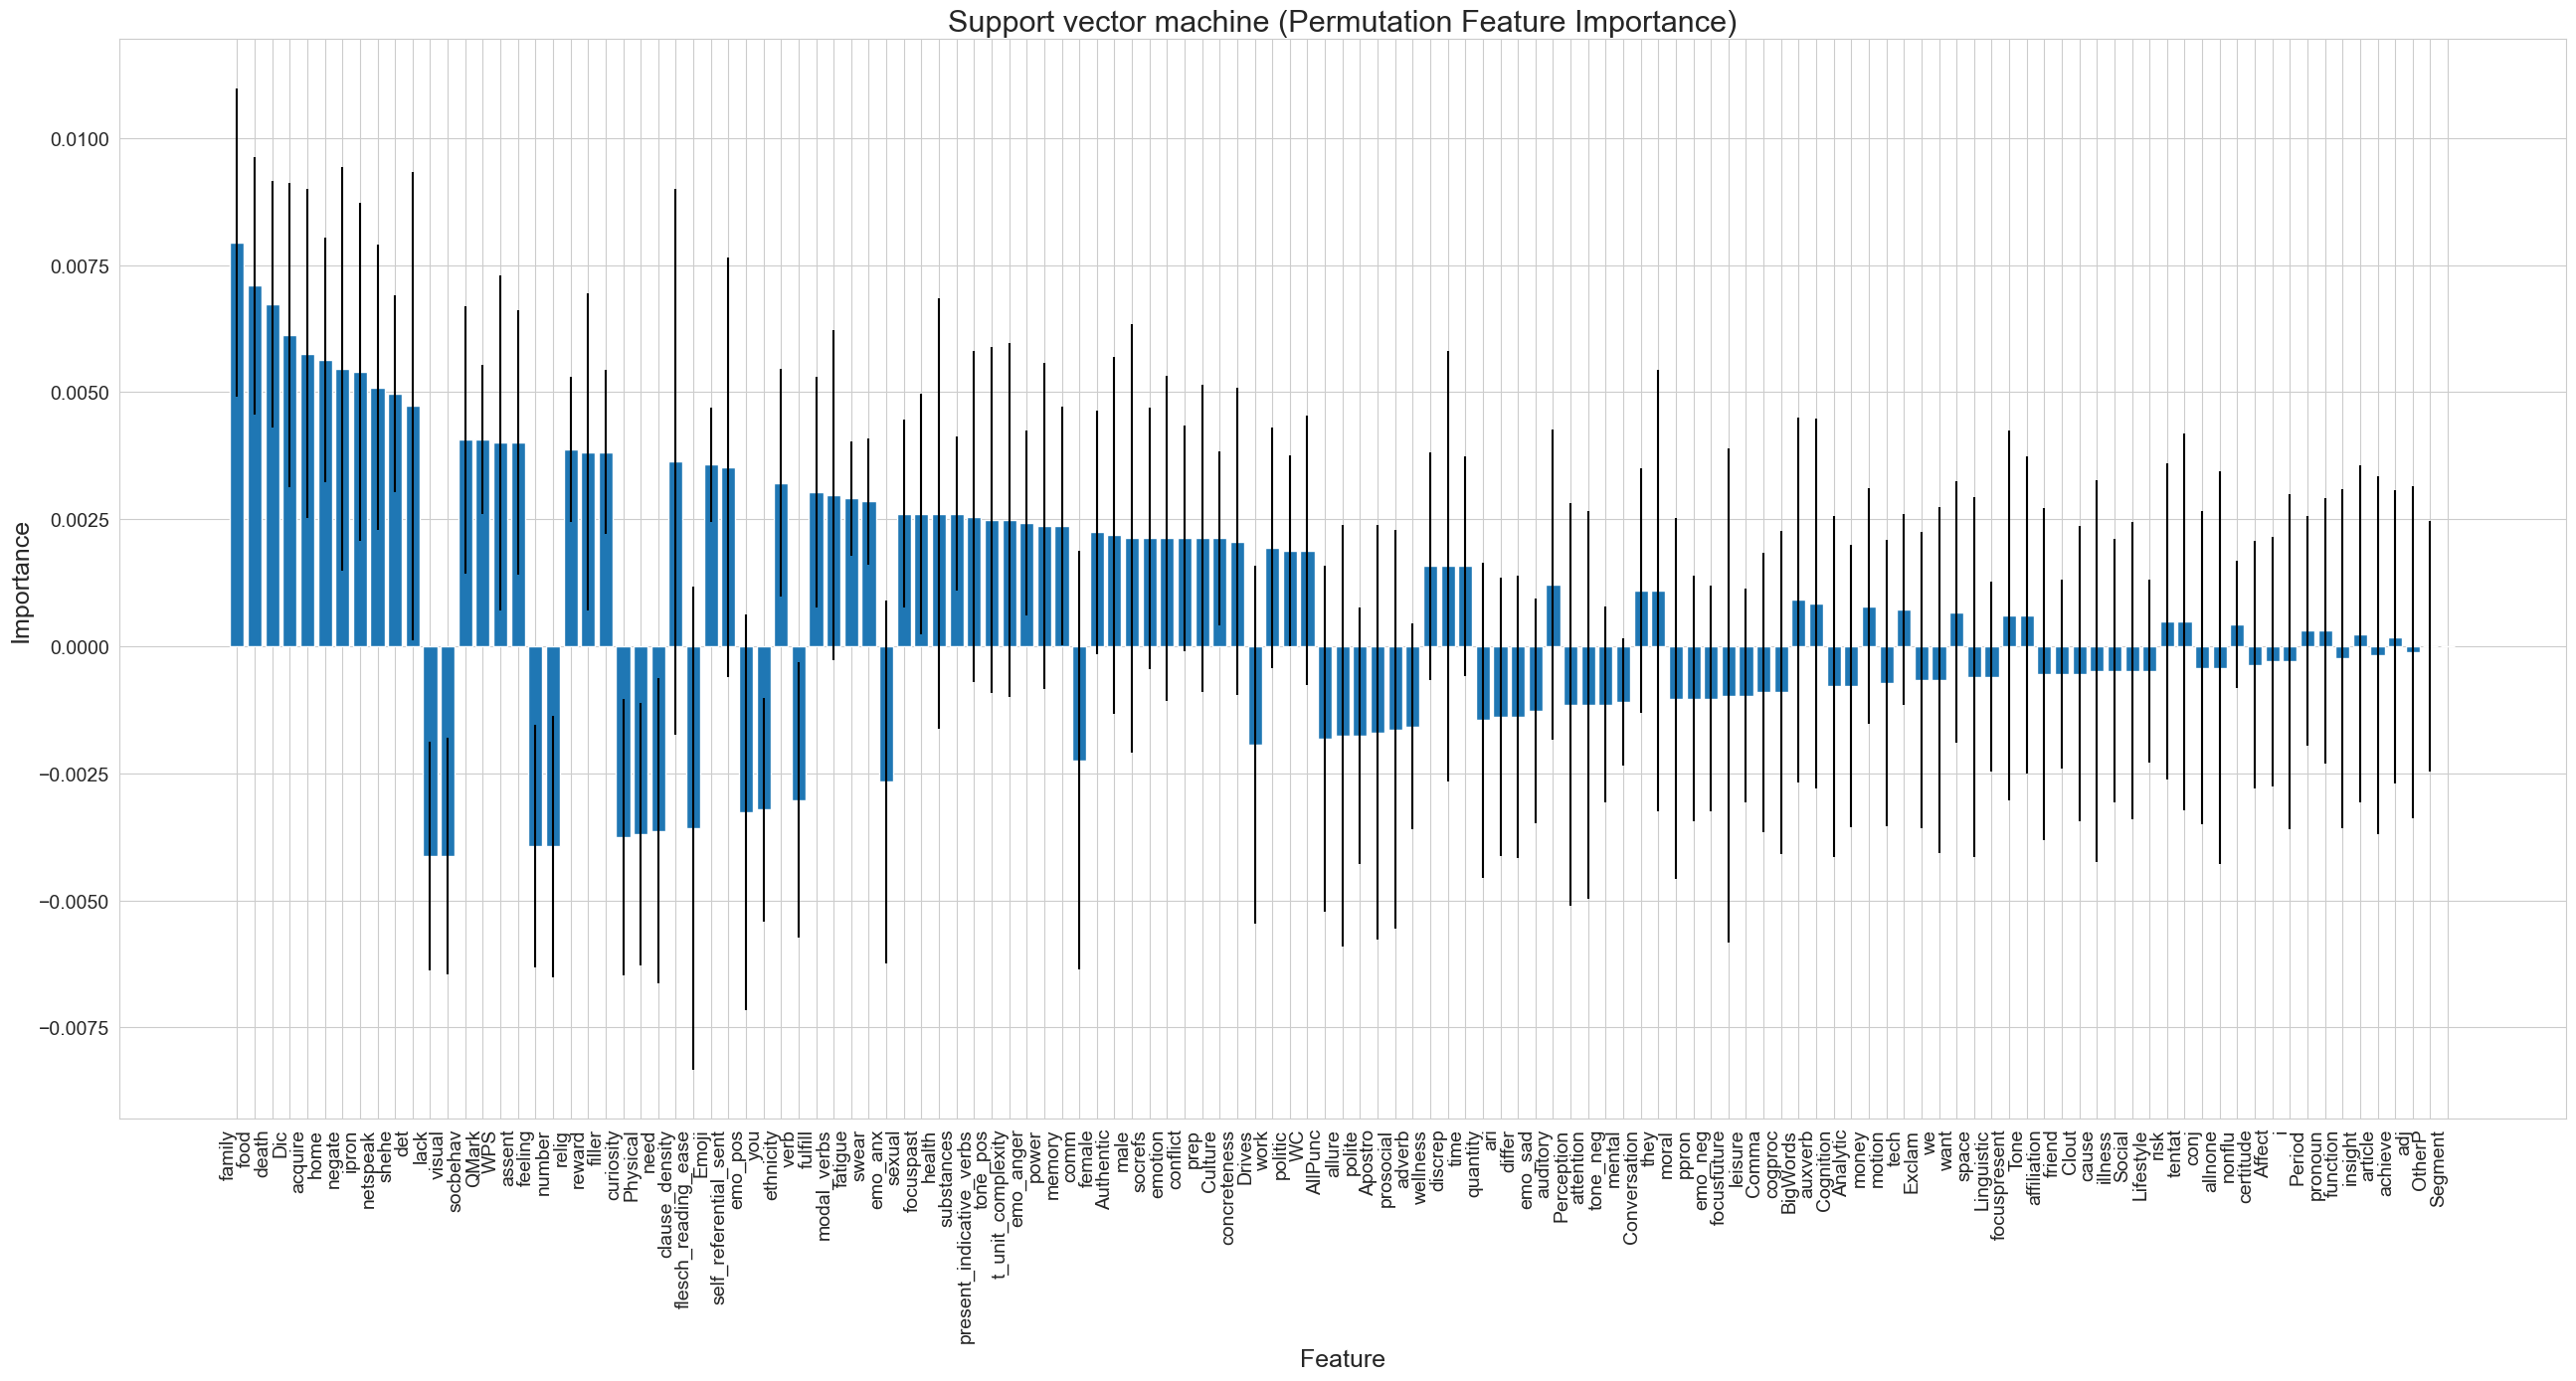

In [130]:

# Create the second subplot for Permutation Importances bar plot
plt.figure(figsize=(26, 14))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'], yerr=importances_df['std'])
plt.xticks(rotation=90, ha='right')
plt.tick_params(labelsize=14)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.title('Support vector machine (Permutation Feature Importance)', fontsize=22)
plt.tight_layout()
plt.show()

In [134]:
importances_df.to_csv('results/permutation_feature_importance_svm.csv', index=False)

## Identify which features have a strong correlation with higher user engagement

In [208]:
import numpy as np
from scipy.stats import spearmanr

ordinal_engagement = np.array(counsel_df_LIWC_analysis['engagement_encoded'])

# Prepare an empty DataFrame for the results
results_df_corr = list()

# Loop through each column in the DataFrame
for column in scaled_numerical_data.columns:
    # Compute the point biserial correlation
    correlation, p_value = spearmanr(scaled_numerical_data[column], ordinal_engagement)

    # Append the results to the results DataFrame
    results_df_corr.append({
        'Column': column,
        'Correlation': correlation,
        'P-value': p_value
    })


/Users/ghaithalseirawan/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [209]:
results_df_corr = pd.DataFrame(results_df_corr)

In [210]:
results_df_corr

,Column,Correlation,P-value
0,modal_verbs,0.090703,3.389858e-06
1,concreteness,0.153019,3.615962e-15
2,flesch_reading_ease,-0.002582,8.950200e-01
3,ari,0.007395,7.054620e-01
4,clause_density,0.129999,2.507880e-11
...,...,...,...
122,QMark,0.033809,8.389053e-02
123,Exclam,-0.021284,2.765855e-01
124,Apostro,0.075757,1.054495e-04
125,OtherP,0.066917,6.167059e-04


In [211]:
results_df_corr.to_csv('results/point_spearmanr_correltation.csv', index=False)

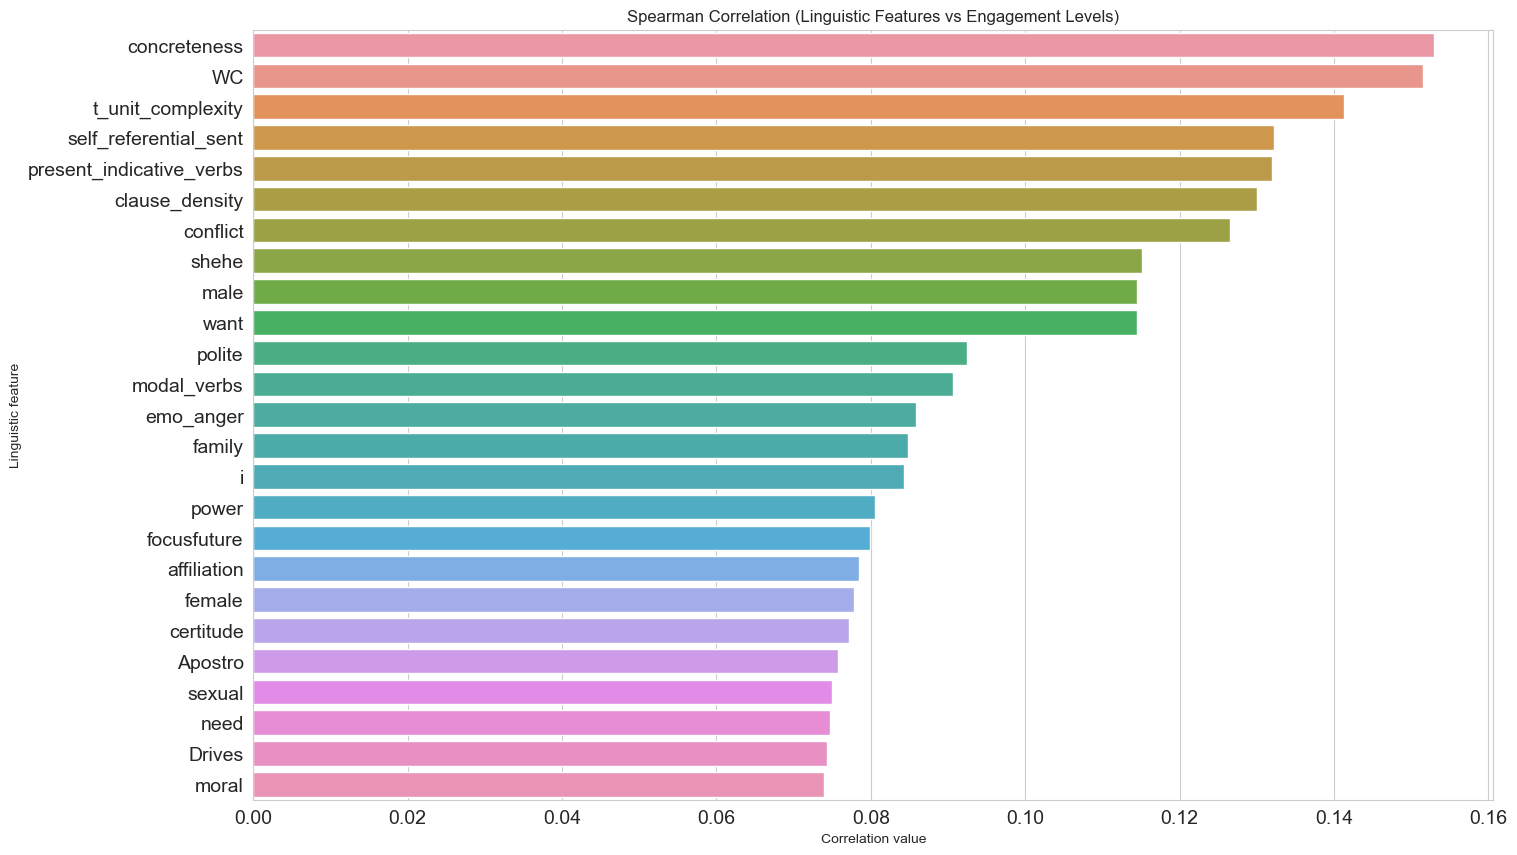

In [245]:
# Plotting with Seaborn
results_df_corr = results_df_corr.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(16, 10))  # Set the size of the plot
ax = sns.barplot(x=results_df_corr.Correlation, y=results_df_corr.Column[:25])  # Create a scatter plot
# Adding titles and labels for clarity
plt.title('Spearman Correlation (Linguistic Features vs Engagement Levels)')
plt.xlabel('Correlation value')
plt.ylabel('Linguistic feature')
plt.tick_params(labelsize=14)

# Show the plot
plt.show()


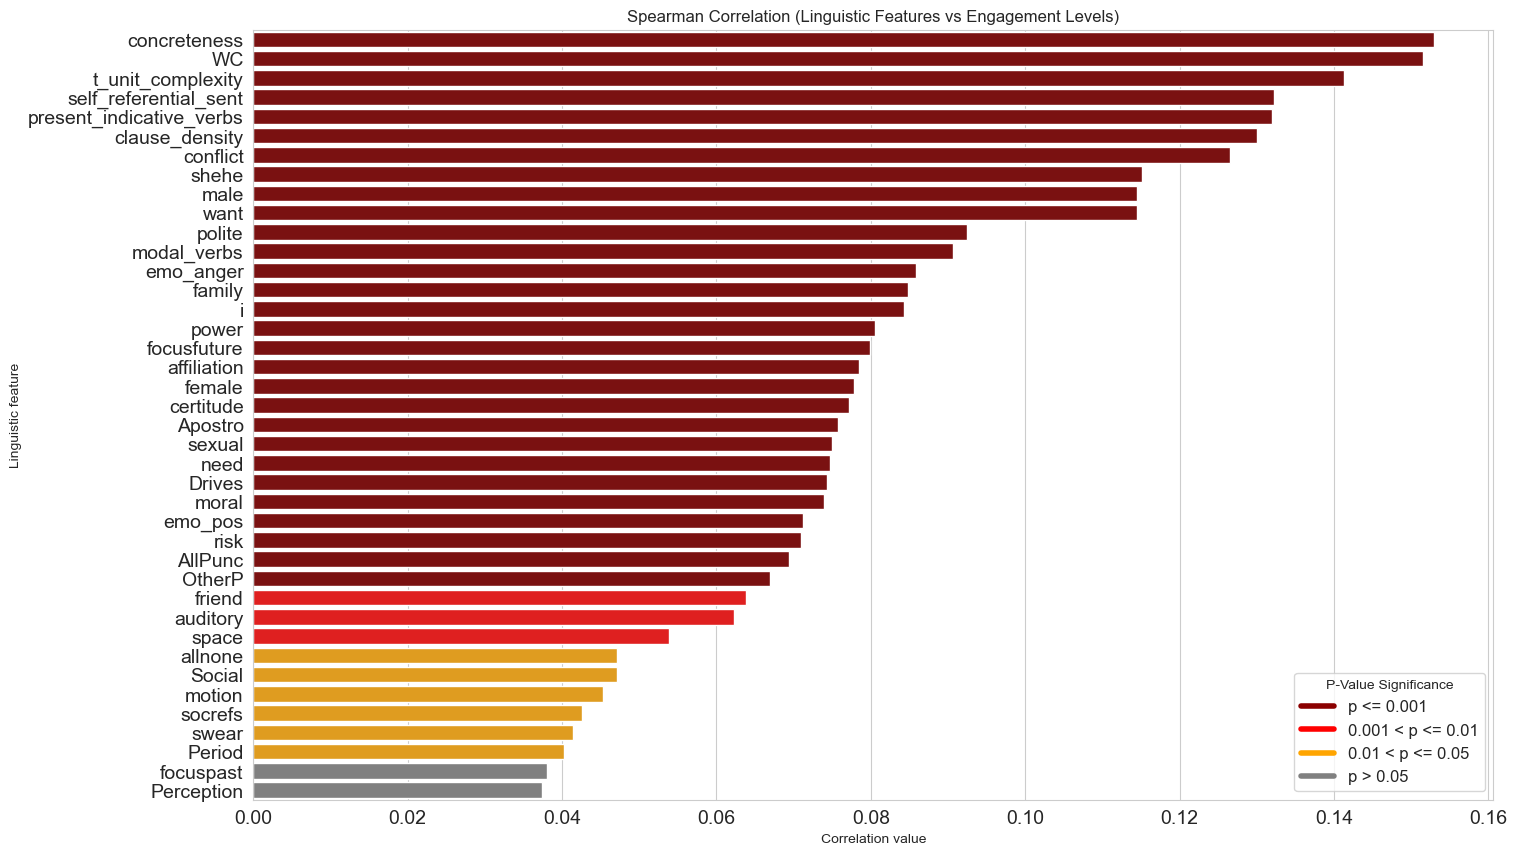

In [244]:
import numpy as np

# Define p-value significance levels and corresponding colors
p_value_significance = [(0.001, 'darkred'), (0.01, 'red'), (0.05, 'orange'), (1, 'gray')]  # Add more levels as needed
colors = [color for _, color in p_value_significance]

# Assign significance level colors to each row in the dataframe
results_df_corr['P-value_color'] = np.select(
    [results_df_corr['P-value'] <= p for p, _ in p_value_significance],
    colors,
    default='gray'
)

# Sort the dataframe based on correlation
results_df_corr = results_df_corr.sort_values(by='Correlation', ascending=False)

# Create the bar plot
plt.figure(figsize=(16, 10))
ax = sns.barplot(x=results_df_corr.Correlation, y=results_df_corr.Column[:40], palette=results_df_corr['P-value_color'])

# Adding titles and labels for clarity
plt.title('Spearman Correlation (Linguistic Features vs Engagement Levels)')
plt.xlabel('Correlation value')
plt.ylabel('Linguistic feature')
plt.tick_params(labelsize=14)

# Create a legend for p-value significance levels
legend_labels = ['p <= 0.001', '0.001 < p <= 0.01', '0.01 < p <= 0.05', 'p > 0.05']
legend_colors = [color for _, color in p_value_significance] + ['gray']
# Add the legend
legend_patches = [plt.Line2D([0], [0], color=color, lw=4, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, title='P-Value Significance', loc='lower right', fontsize=12)

# Show the plot
plt.show()